# Weather Notebook

***
This notebook analysis the weatherreadings csv file in the Data_Files folder of this folder. In specific we are analysing the temperature over 
time. (dryBulbTemperature_Celcius). Pandas has being used to read in the dataset.


![weather](https://www.bigcountryhomepage.com/wp-content/uploads/sites/56/2020/02/Weather-v2.jpg?w=640&h=360&crop=1)


### Description of Assignment

***

### **Tasks**

Task 1: Commit something to your assignment repository this week (anything)

Task 2: I have put a CSV file in a assignment folder in the PFDA-courseware repository

Create a jupyter notebook called `assignment2-weather.ipynb` that has a nice plot of the temperature over time 
`( "dryBulbTemperature_Celsius" )`. 

**Marks will be give for:**

1. Completing the assignment
1. How nice the plot looks
You may use PANDAS if you wish to read in the data

### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.

We use [datetime module ](https://docs.python.org/3/library/datetime.html) which supplies classes for manipulating dates and times. The dateutil module provides powerful extensions to the standard datetime module, available in Python.


In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import dateutil as dateutil
from geopy.geocoders import Nominatim


### Load the dataset

***

The data file has being downloaded from the URL given above and stored in the Data_Files folder in this repository.


In [2]:
# Load the dataset. I have stored the dataset in a folder called Data_Files

df = pd.read_csv('Data_Files/weatherreadings1.csv')


### Data Exploration

***

Display the first 5 rows of the dataset using the `df.head()` function, and check the datafram dimensionally with the `df.info` funtion.

In [3]:
# Display the first 5 rows of the dataset

df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [4]:
# Display information about the dataset such as the number of rows, columns, column data types, memory usage, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

### Convert 'reportStartDateTime' and the 'reportEndDateTime' columns to datetime object

***

Here we are using the `apply()` function and the pandas `to_datetime` method to convert the columns above from objects into datetime objects so that we can them for the purposes of our plots.

In [5]:
#Convert the reportStartDateTime and reportEndDateTime columns to datetime format
df[['reportStartDateTime', 'reportEndDateTime']]= df[['reportStartDateTime', 'reportEndDateTime']].apply(pd.to_datetime)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   siteId                          89 non-null     object             
 1   reportStartDateTime             89 non-null     datetime64[ns, UTC]
 2   reportEndDateTime               89 non-null     datetime64[ns, UTC]
 3   collectionName                  89 non-null     int64              
 4   isPublic                        89 non-null     bool               
 5   isLatestVersion                 89 non-null     bool               
 6   observationType                 89 non-null     int64              
 7   softwareType                    89 non-null     object             
 8   windDirection                   89 non-null     int64              
 9   relativeHumidity                89 non-null     float64            
 10  windSpeed_MilePe

### Drybulb Temperature.

***

The drybulb temperature is the air temperature and is measured by a thermometer that is affected by the moisture content of the air.The Dry Bulb temperature is the air property that is most common used. When people refer to the temperature of the air, they are normally referring to its dry bulb temperature.

Contrast this to the wetbulb temperature which is the lowest temperature that air can cool to when water evaporates into it. This is measured using a thermometer with its bulb wrapped in wet muslin exposed to the airflow. The wet-bulb temperature is always lower or equal to the drybulb temperature of the air. The wet and dry bulb temperatures are only identical when the relative humidity is 100%, when the air is fully saturated.

More information on these can be found at this [link](https://www.weather.gov/source/zhu/ZHU_Training_Page/definitions/dry_wet_bulb_definition/dry_wet_bulb.html#:~:text=The%20wet%20bulb%20temperature%20is%20always%20lower%20than%20the%20dry,state%20of%20the%20humid%20air.)


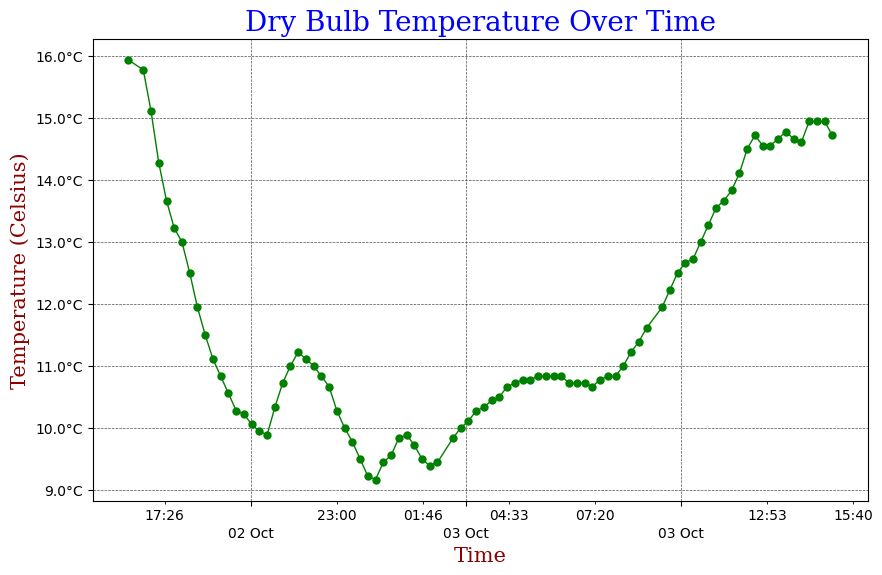

In [ ]:
# Display the drybulb temperature column of the dataset over time

# Create a variable to store the drybulb temperature column of the dataset
drybulb = df['dryBulbTemperature_Celsius'].to_list()
df['time'] = df['reportStartDateTime'].apply(lambda x: x.timestamp())
dateTime = df['time'].to_list()

#Set the font style and size for the title and labels
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Create a function to format the temperature values on the y-axis
def temperature_formatter(drybulb, pos):
    s = f"{drybulb}\N{DEGREE SIGN}C"
    return s

def day_formatter(dateTime, pos):
    day = dt.datetime.fromtimestamp(dateTime).strftime('\n%d %b')
    return day

def time_formatter(dateTime, pos):
    time = dt.datetime.fromtimestamp(dateTime).strftime('%H:%M')
    return time

#Get the maximum and minimum temperatures in the dataset
max = round(df["dryBulbTemperature_Celsius"].max())  
min = round(df["dryBulbTemperature_Celsius"].min()) 

#Get the time of the max and min temperatures in the dataset
max_time = df.loc[df["dryBulbTemperature_Celsius"] == df["dryBulbTemperature_Celsius"].max(), "reportStartDateTime"].values[0]
min_time = df.loc[df["dryBulbTemperature_Celsius"] == df["dryBulbTemperature_Celsius"].min(), "reportStartDateTime"].values[0]

# Create a plot to display the drybulb temperature column of the dataset over time
fig, ax = plt.subplots(figsize=(10, 6))

# Set the title, x-axis label, and y-axis label of the plot
ax.set_title('Dry Bulb Temperature Over Time', fontdict = font1)
ax.set_xlabel('Time', fontdict = font2)
ax.set_ylabel('Temperature (Celsius)', fontdict = font2)
# Plot the drybulb temperature column of the dataset over time
ax.plot(dateTime, drybulb, color='green', marker='o', linestyle='-', linewidth=1, markersize=5)
# Set the y-axis to display the temperature values in Celsius
ax.yaxis.set_major_formatter(temperature_formatter)
ax.tick_params(axis='x', which='minor', bottom=True, top=False, labelbottom=True, labeltop=False)
ax.xaxis.set_minor_formatter(time_formatter)
ax.xaxis.set_minor_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_formatter(day_formatter)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))



ax.annotate(f'max temp {max}°C ', xy=(max_time, max), xytext=(max_time, max+1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )




# annotate the minimum temperature
plt.annotate(f"Min temp\n{min}°C", xy=(min_time, min), 
             xytext=(min_time, min + 3), 
             arrowprops=dict(facecolor="blue", shrink=0.3))

# Add gridlines to the plot
ax.grid(linestyle='--', linewidth=0.5, color='black', alpha=0.7) # Add gridlines


# Display the plot
plt.show()

In [7]:
geolocator = Nominatim(user_agent="myapp")
location = geolocator.reverse("53.5244, -8.8545")

print(location)

62, Blackacre, Tuam, Tuam Municipal District, County Galway, Connacht, H54 V260, Éire / Ireland


## End